In [2]:
import pandas as pd

In [3]:
# samples= pd.read_csv('dataset/Dataset_clean_textblobvader12112023.csv', encoding='ISO-8859-1')
samples= pd.read_csv('dataset/Dataset_clean_textblobvader12112023.csv', encoding='UTF-8')
# samples=samples[['likes','replies','quotes','retweets','searchQuery','clean_content']]

In [4]:
samples.head()

,likes,replies,quotes,retweets,searchQuery,clean_content,tanggal,date,textblob_sentiment,textblob_sentiment_assessment,textblob_polarity,textblob_subject,vader_compound,vader_neg,vader_neu,vader_pos,vader_sentiment
0,0,0,0,0,#gibran,result togel november jogjatoto palembang pool...,11/7/2023,11/7/2023,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral
1,0,0,0,0,#gibran,result togel november jogjatoto sunda pools co...,11/7/2023,11/7/2023,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral
2,0,0,0,0,#gibran,result togel november jogjatoto belarusia pool...,11/7/2023,11/7/2023,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral
3,0,0,0,0,#gibran,result togel november jogjatoto toto macau sea...,11/7/2023,11/7/2023,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral
4,0,0,0,0,#cakimin,politik muhaiminiskandar cakimin mahasiswaunis...,11/7/2023,11/7/2023,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral


In [5]:
# samples.isnull().sum()
# samples.isnull().sum().sum()

In [6]:

samples["clean_content"].describe()

count                                                  5830
unique                                                 3940
top       jokowimenyerahlah mundur ketua mk freepalaesti...
freq                                                     37
Name: clean_content, dtype: object

In [7]:
samples.describe()

,likes,replies,quotes,retweets,textblob_polarity,textblob_subject,vader_compound,vader_neg,vader_neu,vader_pos
count,5830.000000,5830.000000,5830.000000,5830.000000,5830.000000,5830.000000,5830.000000,5830.000000,5830.000000,5830.000000
mean,156.454374,35.033276,4.195540,77.761578,0.008203,0.035164,0.013584,0.005657,0.983175,0.011175
std,1085.247184,387.327978,36.977125,582.525123,0.088965,0.149378,0.137684,0.034230,0.062205,0.050920
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-0.980500,0.000000,0.244000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,30892.000000,7544.000000,1079.000000,16926.000000,1.000000,1.000000,0.911800,0.756000,1.000000,0.730000


In [8]:
len(samples['clean_content'].unique())

3940

In [9]:
print("Jumlah Query unik:",int(len(samples['searchQuery'].unique())))
samples['searchQuery'].unique()

Jumlah Query unik: 26


array(['#gibran', '#cakimin', 'mahfud', 'gibran', '#mahfudmd', '#mahfud',
       '#muhaimin', 'cakimin', 'muhaimin', 'mahfudmd', 'anies', '#ganjar',
       'prabowo', '#prabowo', '#anies', 'ganjar', '#mahfudmd #ganjar',
       '#cakimin #anies', 'anies cakimin', 'anies muhaimin',
       '#gibran #prabowo', 'prabowo gibran', 'ganjar mahfudmd',
       '#muhaimin #anies', 'ganjar mahfud', '#mahfud #mahfud'],
      dtype=object)

In [10]:
samples['clean_content'].nunique()

3940

## Text Statistics

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_737/1680436398.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(samples['likes'],color='m',shade=True)


Text(0.5, 0, 'sentiment')

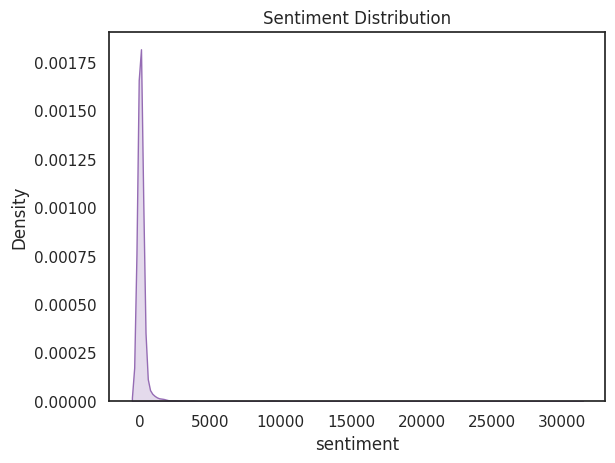

In [12]:
# plt.figure(samples['clean_content'].str.len().hist(alpha=0.3))
sns.set(style="white", palette="muted", color_codes=True)
sns.kdeplot(samples['likes'],color='m',shade=True)
plt.title('Sentiment Distribution')
plt.xlabel('sentiment')

<Axes: >

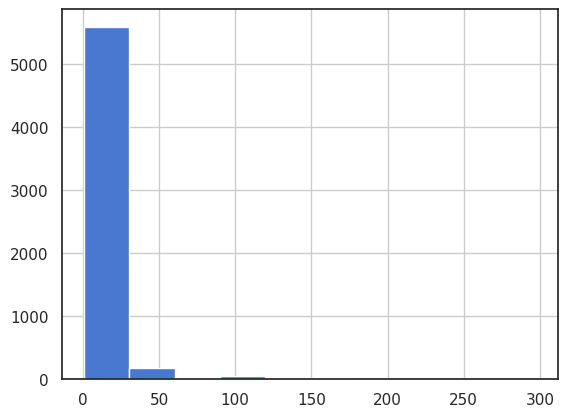

In [13]:
samples['clean_content'].str.split().map(lambda x: len(x)).hist()

## Analyzing Word Lenght

Text(0.5, 0, 'Number of Words')

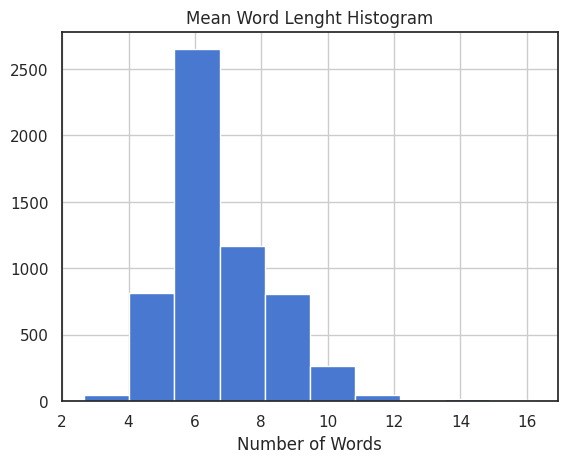

In [14]:
samples['clean_content'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()
plt.title('Mean Word Lenght Histogram')
plt.xlabel('Number of Words')

Text(0.5, 0, 'Number of Words')

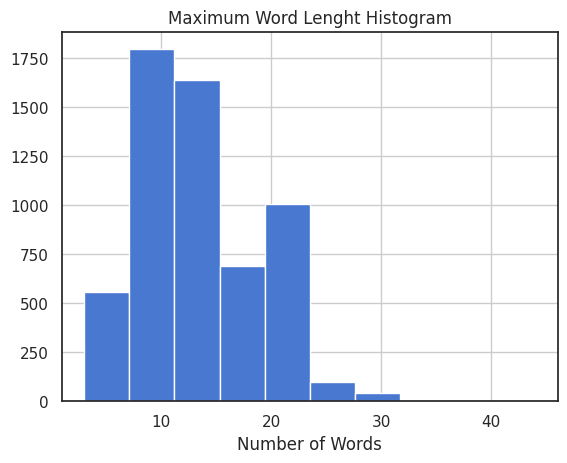

In [15]:
samples['clean_content'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.max(x)).hist()
plt.title('Maximum Word Lenght Histogram')
plt.xlabel('Number of Words')

In [16]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter
from spacy import displacy



In [17]:
# Fetch stopwords
nltk.download('stopwords')
# stop=set(stopwords.words('english')) #for english
stop=set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to /home/gitpod/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
# Create corpus
corpus=[]
new= samples['clean_content'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

Text(0, 0.5, 'Words')

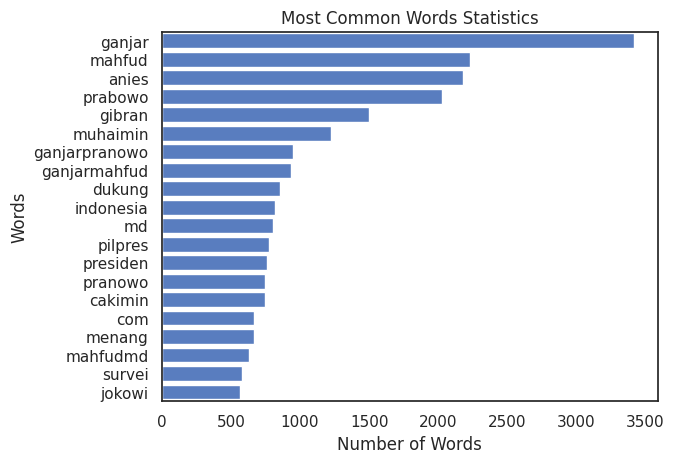

In [19]:
counter=Counter(corpus)
most=counter.most_common()

x, y=[], []
for word,count in most[:20]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)
plt.title('Most Common Words Statistics')
plt.xlabel('Number of Words')
plt.ylabel('Words')

# N-Gram Analysis

In [20]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

## Unigram

<Axes: >

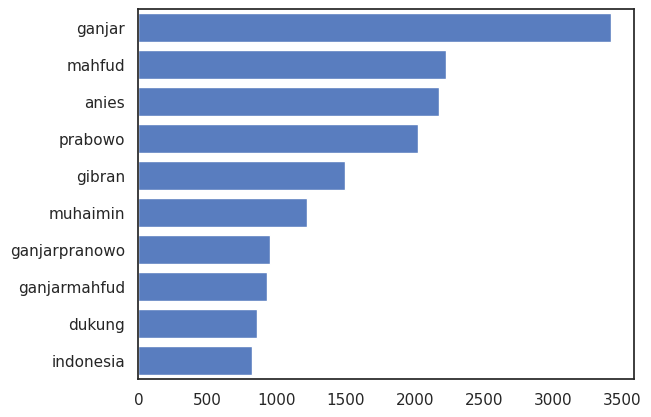

In [21]:
top_n_bigrams=get_top_ngram(samples['clean_content'],1)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

## Bigram

<Axes: >

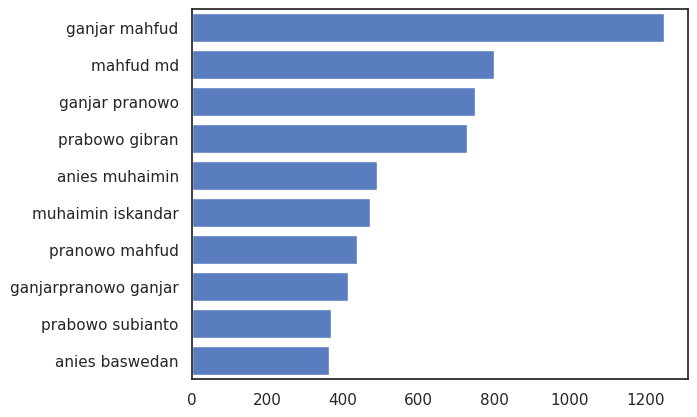

In [22]:
top_n_bigrams=get_top_ngram(samples['clean_content'],2)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

## Trigram

<Axes: >

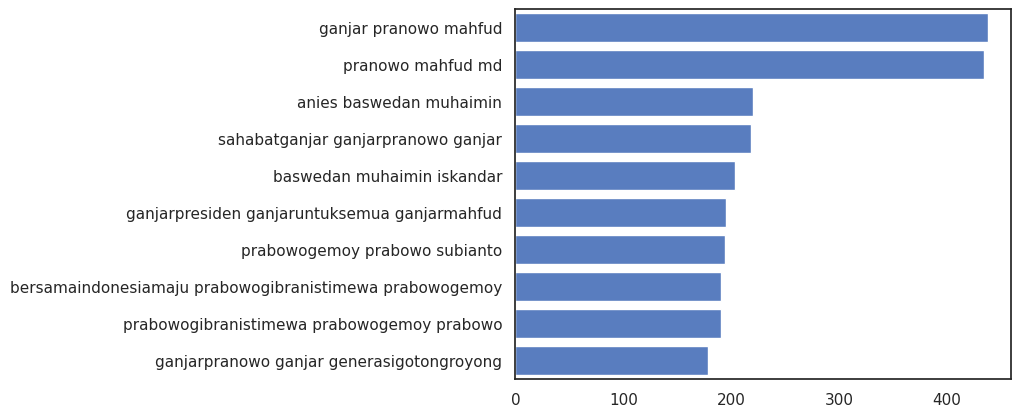

In [23]:
top_n_bigrams=get_top_ngram(samples['clean_content'],3)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

In [24]:
samples.columns

Index(['likes', 'replies', 'quotes', 'retweets', 'searchQuery',
       'clean_content', 'tanggal', 'date', 'textblob_sentiment',
       'textblob_sentiment_assessment', 'textblob_polarity',
       'textblob_subject', 'vader_compound', 'vader_neg', 'vader_neu',
       'vader_pos', 'vader_sentiment'],
      dtype='object')

# Textblob 

In [25]:
def polarity(text):
    tbx=TextBlob(text)#.translate(from_lang='id',to='en')
    # print(tbx)$
    return tbx.sentiment.polarity

<Axes: >

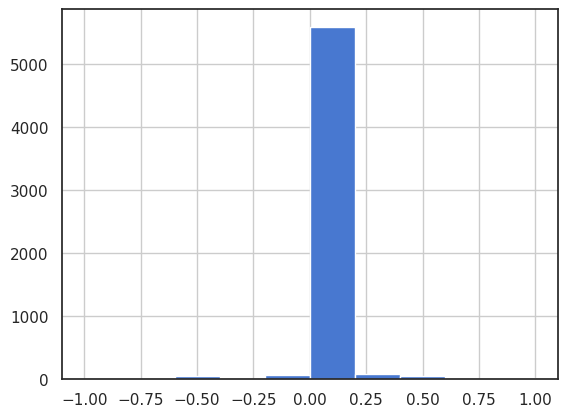

In [26]:
# samples['textblob_polarity']=samples['clean_content'].\
   # apply(lambda x : polarity(x))
samples['textblob_polarity'].hist()

<BarContainer object of 3 artists>

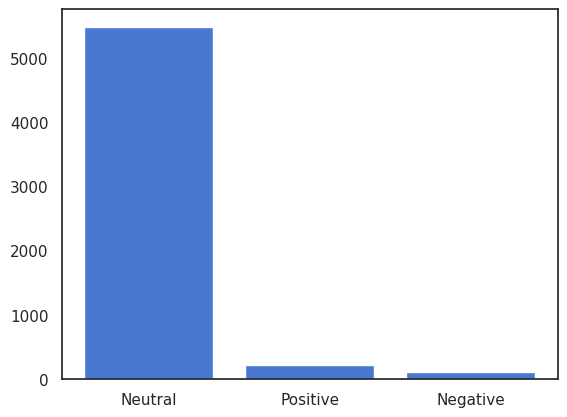

In [27]:
plt.bar(samples.textblob_sentiment.value_counts().index,
        samples.textblob_sentiment.value_counts())

# Vader

<BarContainer object of 3 artists>

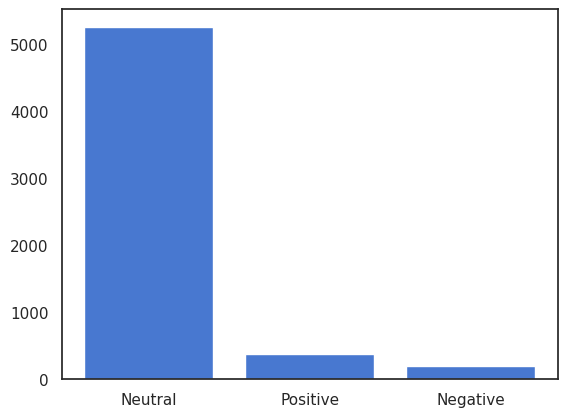

In [28]:
plt.bar(samples.vader_sentiment.value_counts().index,
        samples.vader_sentiment.value_counts())

## 4.5 Feature Extraction

Well, once we have passe through RegEx, stopwords removal and stemming application, to give more meaning for the text we are analysing, we can use approachs like _Bag of Words_, _TF-IDF_ and _Word2Vec_. For make our analysis easier, let's define a function that receives a text and a `vectorizer` object and applies the feature extraction on the respective text.

In [71]:
def extract_features_from_corpus(corpus, vectorizer, df=False):
    """
    Args
    ------------
    text: text to be transformed into a document-term matrix [type: string]
    vectorizer: engine to be used in the transformation [type: object]
    """
    
    # Extracting features
    corpus_features = vectorizer.fit_transform(corpus).toarray()
    features_names = vectorizer.get_feature_names()
    
    # Transforming into a dataframe to give interpetability to the process
    df_corpus_features = None
    if df:
        df_corpus_features = pd.DataFrame(corpus_features, columns=features_names)
    
    return corpus_features, df_corpus_features

### 4.5.1 CountVectorizer
On the _Bag of Words_ approach, we create a dicitonary vocabulary with all the unique words and, for each word in each comment/text string, we index the words into a vector that represents the occurence (1) or not (0) of each word. This is a way for transforming a text into a frequency vector considering a literal bag of words (dictionary vocabulary).

In [70]:
# Examples of some portuguese stopwords
ina_stopwords = stopwords.words('indonesian')
print(f'Total portuguese stopwords in the nltk.corpous module: {len(ina_stopwords)}')
ina_stopwords[:10]

Total portuguese stopwords in the nltk.corpous module: 758


['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir']

In [105]:
# Creating an object for the CountVectorizer class
count_vectorizer = CountVectorizer(max_features=300, min_df=7, max_df=0.8, stop_words=ina_stopwords)

# Extracting features for the corpus
countv_features, df_countv_features = extract_features_from_corpus(samples['clean_content'], count_vectorizer, df=True)
print(f'Shape of countv_features matrix: {countv_features.shape}\n')
print(f'Example of DataFrame of corpus features:')
df_countv_features.head()

/workspace/.pyenv_mirror/user/current/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [106]:
def ngrams_count(corpus, ngram_range, n=-1, cached_stopwords=stopwords.words('indonesian')):
    """
    Args
    ----------
    corpus: text to be analysed [type: pd.DataFrame]
    ngram_range: type of n gram to be used on analysis [type: tuple]
    n: top limit of ngrams to be shown [type: int, default: -1]
    """
    
    # Using CountVectorizer to build a bag of words using the given corpus
    vectorizer = CountVectorizer(stop_words=cached_stopwords, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    total_list = words_freq[:n]
    
    # Returning a DataFrame with the ngrams count
    count_df = pd.DataFrame(total_list, columns=['ngram', 'count'])
    return count_df

In [107]:
# Generating words
# pos_comments = list(df_comments.query('sentiment_label == "positive"')['stopwords_removed'].values)
# positive_words = ' '.join(pos_comments).split(' ')
# neg_comments = list(df_comments.query('sentiment_label == "negative"')['stopwords_removed'].values)
# negative_words = ' '.join(neg_comments).split(' ')

In [108]:
samples.columns

Index(['likes', 'replies', 'quotes', 'retweets', 'searchQuery',
       'clean_content', 'tanggal', 'date', 'textblob_sentiment',
       'textblob_sentiment_assessment', 'textblob_polarity',
       'textblob_subject', 'vader_compound', 'vader_neg', 'vader_neu',
       'vader_pos', 'vader_sentiment'],
      dtype='object')

In [128]:

# ganjarpos=list(samples.query('(searchQuery=="ganjar") and (vader_sentiment=="Positive")')['vader_sentiment'].values)
# ganjarpos=list(samples.query('(searchQuery=="anies") and (vader_sentiment=="Positive")')['clean_content'])
ganjarpos=list(samples.query('(vader_sentiment=="Positive")')['clean_content'])
ganjarneg=list(samples.query('(vader_sentiment=="Negative")')['clean_content'])
ganjarneu=list(samples.query('(vader_sentiment=="Neutral")')['clean_content'])
# ganjarneg=list(samples.query('(searchQuery=="anies") and (vader_sentiment=="Negative")')['clean_content'])
# ganjarneg=list(samples.query('(searchQuery=="ganjar") and (vader_sentiment=="Negative")')['vader_sentiment'].values)
# ganjarneu=list(samples.query('(searchQuery=="ganjar") and (vader_sentiment=="Neutral")')['vader_sentiment'].values)
# ganjarpos=list(samples.query('(searchQuery=="ganjar") and (vader_sentiment=="Positive")')[['searchQuery','vader_sentiment','clean_content']].values)

In [136]:
print(ganjarneu)

['result togel november jogjatoto palembang pools coba hoki nya jogjatoto taut https jogja com hasilresulttogel resulttogel resulttogelwla gibran hujan undip prabowo minggu togelwla jogjatoto hasilresultjogjatoto chonburipools', 'result togel november jogjatoto sunda pools coba hoki nya jogjatoto taut https jogja com hasilresulttogel resulttogel resulttogelwla gibran hujan undip prabowo minggu togelwla jogjatoto hasilresultjogjatoto chonburipools', 'result togel november jogjatoto belarusia pools coba hoki nya jogjatoto taut https jogja com hasilresulttogel resulttogel resulttogelwla gibran hujan undip prabowo minggu togelwla jogjatoto hasilresultjogjatoto chonburipools', 'result togel november jogjatoto toto macau season coba hoki nya jogjatoto taut https jogja com hasilresulttogel resulttogel resulttogelwla gibran hujan undip prabowo minggu togelwla jogjatoto hasilresultjogjatoto chonburipools', 'politik muhaiminiskandar cakimin mahasiswaunisma unisma viral mahasiswa tinggal auditori

In [137]:
unigrams_pos = ngrams_count(ganjarpos, (1, 1), 10)
unigrams_neg = ngrams_count(ganjarneg, (1, 1), 10)
unigrams_neu = ngrams_count(ganjarneu, (1, 1), 10)

bigrams_pos = ngrams_count(ganjarpos, (2, 2), 10)
bigrams_neg = ngrams_count(ganjarneg, (2, 2), 10)
bigrams_neu = ngrams_count(ganjarneu, (2, 2), 10)

trigrams_pos = ngrams_count(ganjarpos, (3, 3), 10)
trigrams_neg = ngrams_count(ganjarneg, (3, 3), 10)
trigrams_neu = ngrams_count(ganjarneu, (3, 3), 10)

# print(unigrams_pos)

/workspace/.pyenv_mirror/user/current/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


/tmp/ipykernel_737/1392205849.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ngram', data=ngram_data, ax=ax, palette=colors[j])
/tmp/ipykernel_737/1392205849.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ngram', data=ngram_data, ax=ax, palette=colors[j])
/tmp/ipykernel_737/1392205849.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ngram', data=ngram_data, ax=ax, palette=colors[j])
/tmp/ipykernel_737/1392205849.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is depr

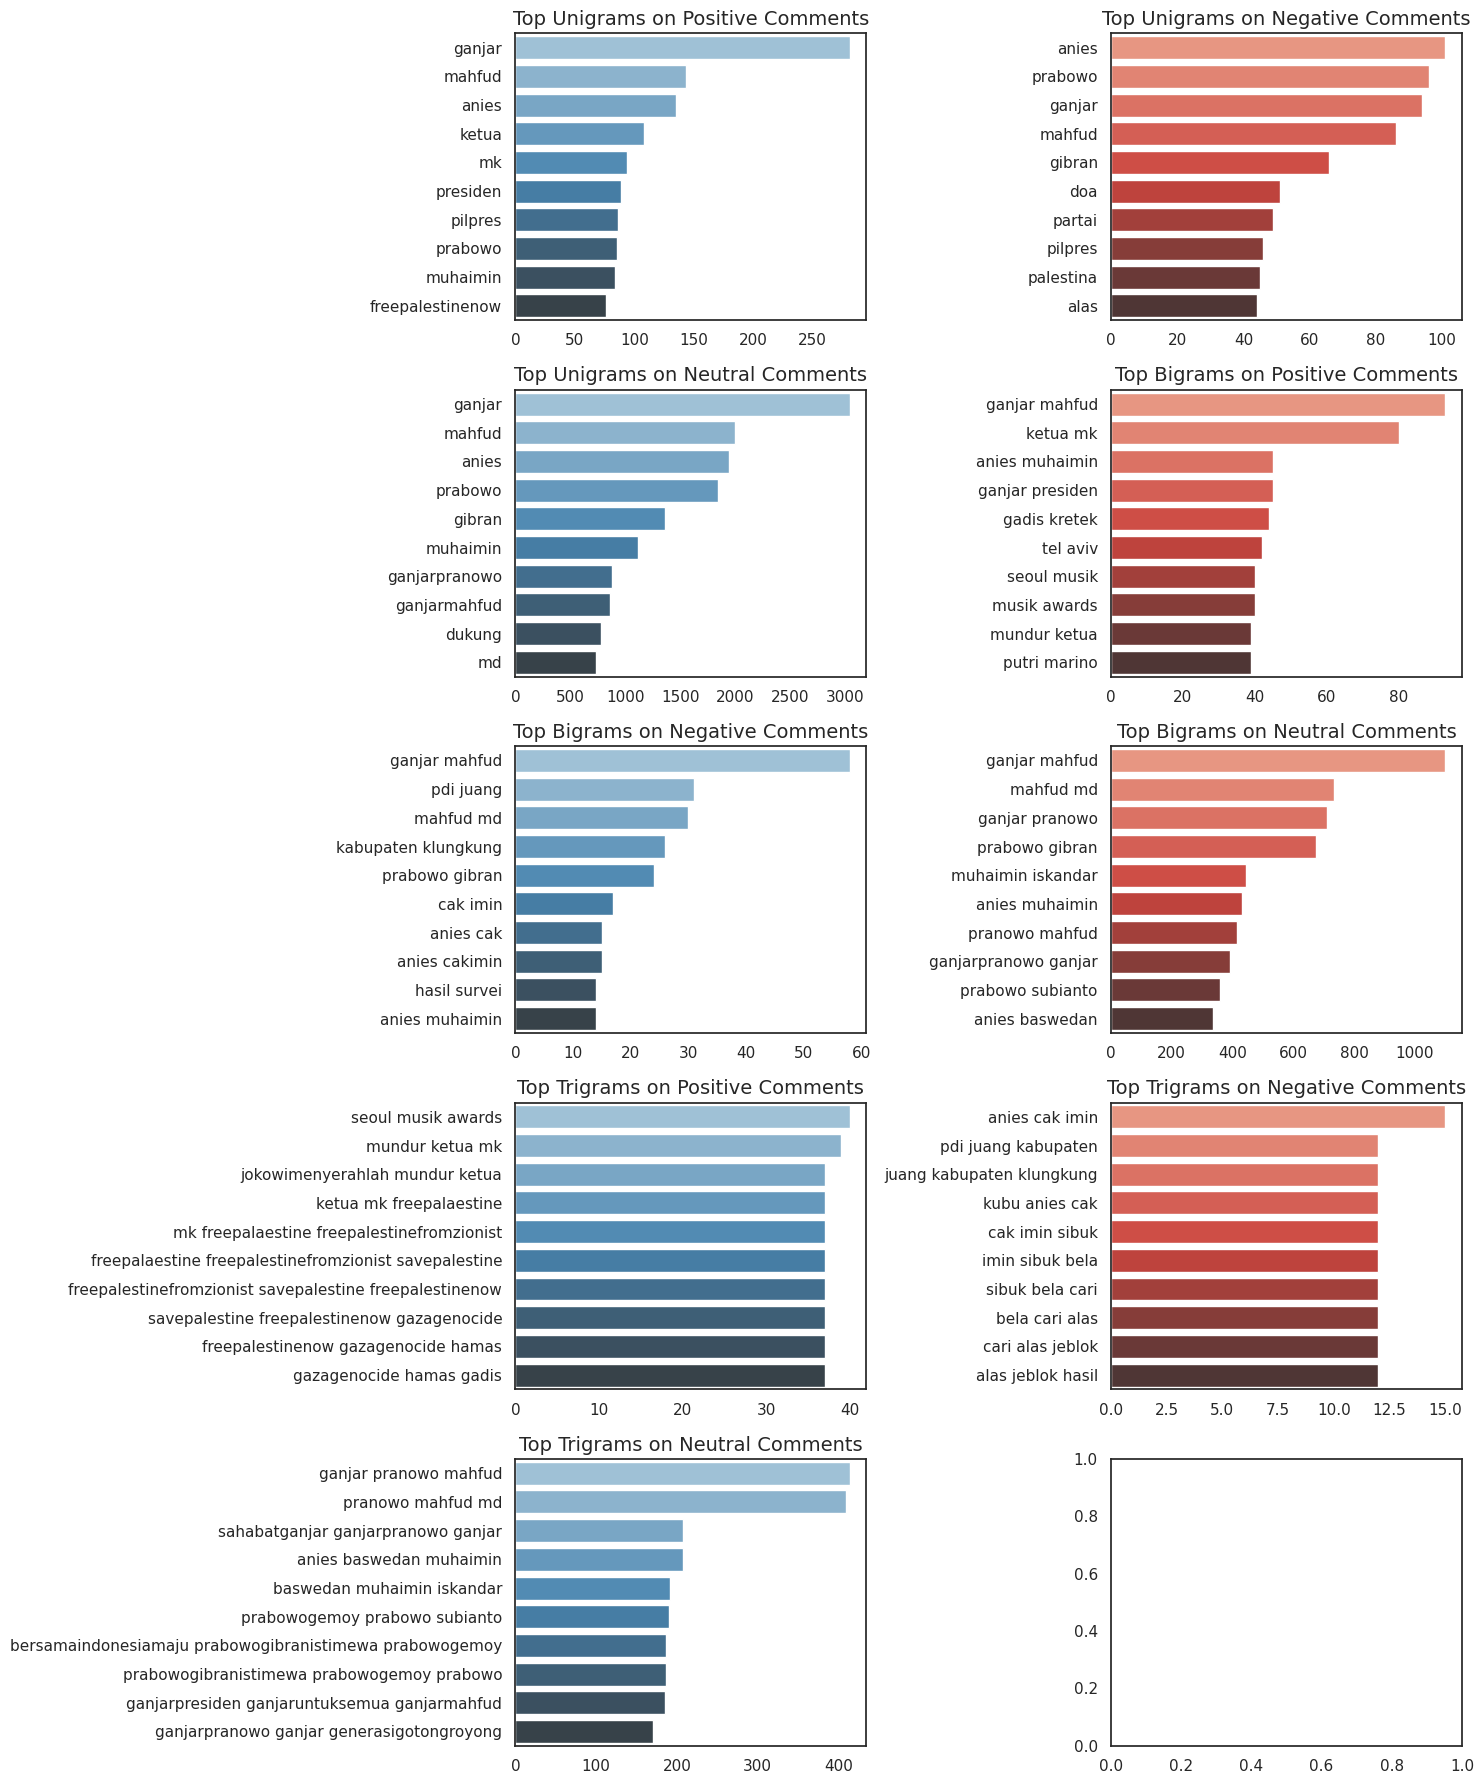

In [148]:
# Joining everything in a python dictionary to make the plots easier
ngram_dict_plot = {
    'Top Unigrams on Positive Comments': unigrams_pos,
    'Top Unigrams on Negative Comments': unigrams_neg,
    'Top Unigrams on Neutral Comments': unigrams_neu,
    'Top Bigrams on Positive Comments': bigrams_pos,
    'Top Bigrams on Negative Comments': bigrams_neg,
    'Top Bigrams on Neutral Comments': bigrams_neu,
    'Top Trigrams on Positive Comments': trigrams_pos,
    'Top Trigrams on Negative Comments': trigrams_neg,
    'Top Trigrams on Neutral Comments': trigrams_neu,
}
# Plotting the ngrams analysis
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))
i, j = 0, 0
colors = ['Blues_d', 'Reds_d']
for title, ngram_data in ngram_dict_plot.items():
    ax = axs[i, j]
    sns.barplot(x='count', y='ngram', data=ngram_data, ax=ax, palette=colors[j])
    
    # Customizing plots
    # format_spines(ax, right_border=False)
    ax.set_title(title, size=14)
    ax.set_ylabel('')
    ax.set_xlabel('')
    
    # Incrementing the index
    j += 1
    if j == 2:
        j = 0
        i += 1
plt.tight_layout()
plt.show()